# About Series

* Series란?<br>
    Data의 컬럼이 1개인 자료구조이며, 인덱스와 1개의 열로 구성되어 있음

## Series 만드는 방법

* pd.Series()에 DataType이 1. 리스트 혹은 2.딕셔너리 로 만들 수 있음<br>

* 딕셔너리의 경우 index와 value가 같이 만들어지며, 리스트의 경우 value만 지정

In [3]:
import pandas as pd

In [5]:
ls1 = [1,2,3,4,5,6,7,8,9]
ls2 = [1,2,3,'apple','play',6,7,8,9]
sr1 = pd.Series(ls1)
sr2 = pd.Series(ls2)

In [8]:
sr1.name = 'Number'
sr2.name = 'Object'

In [9]:
sr1

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: Number, dtype: int64

In [10]:
sr2

0        1
1        2
2        3
3    apple
4     play
5        6
6        7
7        8
8        9
Name: Object, dtype: object

In [13]:
dict = {'a':1,"b":2,"c":3} # key값이 인덱스, value값은 value값으로
sr3 = pd.Series(dict)
sr3.name = "Number"
sr3

a    1
b    2
c    3
Name: Number, dtype: int64

## 삼성전자 종가 Series로 불러오기

* `path` : 불러올 데이터의 상대/절대 경로<br>
* `index_col` : 불러올 데이터의 인덱스 번호값을 -> 인덱스로 설정하는 설정<br>
* `header` : 불러올 데이터의 행의 인덱스 번호값을 -> 시리즈르 열의 이름값으로 설정  <br>

In [20]:
samsung_price=pd.read_csv('./Data/삼성전자 종가.csv', index_col= 0, header=0)
samsung_price=samsung_price.squeeze()
samsung_price

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

In [21]:
# samsung_price의 index만 따로 추출
samsung_price.index

Index(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-15',
       ...
       '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09', '2021-12-10',
       '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16', '2021-12-17'],
      dtype='object', name='Date', length=977)

In [22]:
date = '2020-01-01'

if date in samsung_price.index:
    data = samsung_price[date]
else:
    print("찾는 값이 없습니다")

찾는 값이 없습니다


In [25]:
# 100번째 Dataq값은?
samsung_price.iloc[100]

np.int64(49500)

## Series에 새로운 행을 추가하고 싶을때?

In [76]:
samsung_price=pd.read_csv('./Data/삼성전자 종가.csv', index_col= 0, header=0)
samsung_price=samsung_price.squeeze()
samsung_price

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

In [72]:
samsung_price.shape

(977,)

In [73]:
# samsung_price에 '2021-12-19'주가를 추가하고 싶다면?

samsung_price.loc['2021-12-19'] = 77100
samsung_price

samsung_price.loc['2021-12-16'] = 77100
samsung_price

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-14    77000
2021-12-15    77600
2021-12-16    77100
2021-12-17    78000
2021-12-19    77100
Name: Close, Length: 978, dtype: int64

In [74]:
samsung_price.describe()

count      978.000000
mean     57315.388548
std      14090.405328
min      37450.000000
25%      46300.000000
50%      51300.000000
75%      70200.000000
max      91000.000000
Name: Close, dtype: float64

## 두개의 Series 연결
- 리스트에서 데이터를 추가할 때 `.append`를 사용하듯
- Series도 append를 사용한다 
- 바뀜! `pd.concoat([])`
- `ignore_index = False`를 사용하자, 새롭게 인덱스를 설정할려면 True 라고 한다

In [43]:
df=pd.read_excel('./Data/samsung_excel.xlsx', sheet_name= 0,index_col= 0) # sheet_name = 엑셀의 시트 이름, 인덱스
series1_samsung=df.squeeze()

df2=pd.read_excel('./Data/samsung_excel.xlsx', sheet_name= 1,index_col= 0) # sheet_name = 엑셀의 시트 이름, 인덱스
series2_samsung=df2.squeeze()

series_samsung = pd.concat([series1_samsung,series2_samsung], ignore_index=False)
series_samsung

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-20    77100
2021-12-21    78100
2021-12-22    79400
2021-12-23    79900
2021-12-24    80500
Name: Close, Length: 982, dtype: int64

## Series 기본 통계치 구하기

In [44]:
samsung_price.min()
samsung_price.max()

samsung_price.describe()

count      978.000000
mean     57315.388548
std      14090.405328
min      37450.000000
25%      46300.000000
50%      51300.000000
75%      70200.000000
max      91000.000000
Name: Close, dtype: float64

In [49]:
# 언제 고점일지?
samsung_price[samsung_price.values==samsung_price.max()]

Date
2021-01-11    91000
Name: Close, dtype: int64

In [50]:
samsung_price.argmax() # argmax로 -> 최대값의 인덱스 값을 찾는다다 

np.int64(743)

In [58]:
# argmax랑 iloc를 사용해서 -> 최대값을 찾는다 
print(samsung_price.iloc[samsung_price.argmax()])
print(samsung_price.index[samsung_price.argmax()])


91000
2021-01-11


## Numpy
- Series 혹은 DataFrame의 값은 numpy로 되어있다


In [77]:
samsung_price=pd.read_csv('./Data/삼성전자 종가.csv', index_col= 0, header=0)
samsung_price=samsung_price.squeeze()
samsung_price

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

In [78]:
import numpy as np

In [83]:
ls = [1,2,3,4]
arr = np.array([1,2,3,4])
arr2 = np.array([[1,2,3],[4,5,6]])

In [80]:
arr.shape

(4,)

In [84]:
arr2.shape

(2, 3)

## Series 연산
* 삼성전자 수익률 구하기

- Series와 DataFrame의 연산을 하려면 BroadCastion에 대해서 파악하고 있어야 한다
- 특정 조건의 행과 열중에 하나라도 같다면, 두 크기가 달라고 같게 연산을 할 수 있게 하는 것!
- 작년 수업시간에 배워서 편하게 이해할 수 있었다

In [85]:
arr3=np.array([[1,2],[3,4]])
print(arr3.shape)

(2, 2)


In [91]:
arr3 +1 
# 1을 2행2열 짜리로 바꿔서 [[1,1],[1,1]] 이런식으로 브로드 캐스팅이 되는 것!
# 정수랑 array를 연산한다고??? -> 이런 것이 바로 numpy의 브로드 캐스팅이 적용되었기 때문이다(구조가 array로 되어있기 때문에!!!)

array([[2, 3],
       [4, 5]])

In [90]:
samsung_price.values == samsung_price.max()
print(samsung_price.shape)
# 즉 (977,)과 max 값 하나와 비교하는 것! 
# 결과가 즉 (977,) 과 max값 -> (977,)로 바뀌어서 결과값도 (977,)로 나오게 된다!!!
# 이것이 바로 브로드 캐스팅값이다

(977,)


### 삼성전자 수익률의 Series로 여러 문제 풀어보기

In [92]:
samsung_price=pd.read_csv('./Data/삼성전자 종가.csv', index_col= 0, header=0)
samsung_price=samsung_price.squeeze()
samsung_price

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

In [95]:
samsung_price.shift(1) # 한칸씩 뒤로 밀러진다

Date
2018-01-02        NaN
2018-01-03    51020.0
2018-01-04    51620.0
2018-01-05    51080.0
2018-01-08    52120.0
               ...   
2021-12-13    76900.0
2021-12-14    76800.0
2021-12-15    77000.0
2021-12-16    77600.0
2021-12-17    77800.0
Name: Close, Length: 977, dtype: float64

In [98]:
samsung_return=(samsung_price - samsung_price.shift(1)) / samsung_price.shift(1)
type(samsung_return)

pandas.core.series.Series

In [101]:
samsung_price.pct_change()


Date
2018-01-02         NaN
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64

In [102]:
samsung_return

Date
2018-01-02         NaN
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64

In [104]:
samsung_return.max()

np.float64(0.10470588235294118)

In [106]:
samsung_return.index[samsung_return.argmax()]

'2020-03-24'

## Nan값

In [107]:
samsung_return.dropna()

Date
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
2018-01-09   -0.031142
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 976, dtype: float64

In [108]:
samsung_return.fillna(0)

Date
2018-01-02    0.000000
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64

## 순서대로 정렬

In [111]:
samsung_price.sort_index(ascending=True) # 오름차순
samsung_price.sort_index(ascending=False) # 내림차순

Date
2021-12-17    78000
2021-12-16    77800
2021-12-15    77600
2021-12-14    77000
2021-12-13    76800
              ...  
2018-01-08    52020
2018-01-05    52120
2018-01-04    51080
2018-01-03    51620
2018-01-02    51020
Name: Close, Length: 977, dtype: int64

In [113]:
samsung_price.sort_values(ascending=True) 
samsung_price.sort_values(ascending=False)

Date
2021-01-11    91000
2021-01-12    90600
2021-01-14    89700
2021-01-13    89700
2021-01-25    89400
              ...  
2018-12-26    38350
2018-12-27    38250
2019-01-08    38100
2019-01-03    37600
2019-01-04    37450
Name: Close, Length: 977, dtype: int64

In [116]:
samsung_price.sort_values(ascending=False).values[0]

np.int64(91000)

## Series 조건설정

In [ ]:
#  Quiz) 삼성전자 seires에서 수익률이 4% 이상이 되는 빈도수는 어느정도였을까?

In [117]:
samsung_return *=100

In [118]:
samsung_return

Date
2018-01-02         NaN
2018-01-03    1.176009
2018-01-04   -1.046106
2018-01-05    2.036022
2018-01-08   -0.191865
                ...   
2021-12-13   -0.130039
2021-12-14    0.260417
2021-12-15    0.779221
2021-12-16    0.257732
2021-12-17    0.257069
Name: Close, Length: 977, dtype: float64

In [124]:
samsung_return[samsung_return.values >=4]

Date
2018-03-06     4.026549
2018-09-14     4.086266
2018-11-02     4.744958
2019-03-21     4.086266
2020-03-20     5.704307
2020-03-24    10.470588
2020-04-17     4.897959
2020-06-03     6.031128
2020-06-16     4.408818
2020-07-28     5.395683
2020-11-16     4.905063
2020-11-23     4.327666
2020-12-24     5.277402
2021-01-08     7.117008
2021-02-25     4.024390
2021-11-22     5.196629
2021-12-01     4.347826
Name: Close, dtype: float64

In [125]:
sum(samsung_return.values >=4) # 4이상의 개수수

np.int64(17)

In [126]:
# 퀴즈 답
sum(samsung_return.values >=4) / len(samsung_return) *100

np.float64(1.7400204708290685)

In [127]:
np.where() # 조건, 참값, 거짓값

977

In [133]:
#  Quiz) 삼성전자 seires에서 수익률이 4% 이상이면 1, 작으면 0으로 하는 시리즈를 만들어라
np.where(samsung_return.values >=4,1,0)

samsung_return_return_over_4 = pd.Series(np.where(samsung_return.values >=4,"Over 4%","Under"))
samsung_return_return_over_4.index = samsung_return.index
samsung_return_return_over_4.loc['2020-06-16']

'Over 4%'

## Pandas Rolling
- series.rolling(window = days).내가 원하는것!
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html?highlight=rolling


In [135]:
samsung_return

Date
2018-01-02         NaN
2018-01-03    1.176009
2018-01-04   -1.046106
2018-01-05    2.036022
2018-01-08   -0.191865
                ...   
2021-12-13   -0.130039
2021-12-14    0.260417
2021-12-15    0.779221
2021-12-16    0.257732
2021-12-17    0.257069
Name: Close, Length: 977, dtype: float64

In [136]:
samsung_price.mean()

np.float64(57295.85465711361)

<Axes: xlabel='Date'>

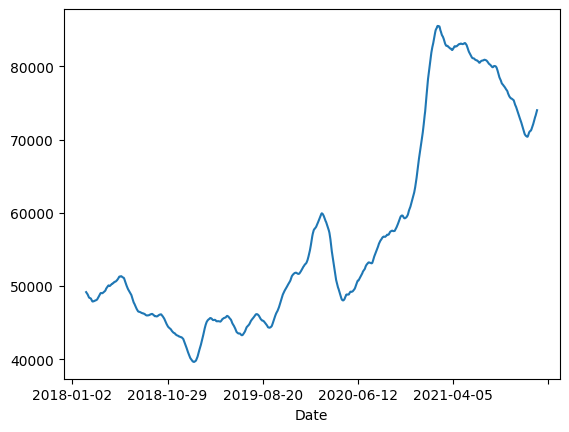

In [ ]:
samsung_price.rolling(30).mean().plot() # rolling을 통해서 원하는 이동평균을 구할 수 있다.